<a href="https://colab.research.google.com/github/sowmen/Deepfake-Challenge-Kaggle/blob/master/important_frames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Necessary Libraries

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import cv2

from PIL import Image
import skimage
from skimage import data
from skimage.color import rgb2gray
from skimage.color import gray2rgb
from skimage import measure
import sys
from google.colab import files
from skimage.metrics import structural_similarity as ssim
import argparse
import imutils
import random

Structural Similarity Index is a way to measure similarity between two images.
In python this technique is available as a OpenCv library function.
It returns value between -1.00 to 1.00 (floating value).
If we compare two images using the function: 
If we get -1.00 as returned value, we can say that the images are completely different.
If we get 1.00 as returned value, we can say that the images are completely same.
Any value close to 1 indicates matching.
https://www.cns.nyu.edu/pub/eero/wang03-reprint.pdf 

In [0]:
def structuralSimilarityIndex(imageA, imageB):
  dim = (50, 50)
  A = cv2.resize(imageA, dim, interpolation = cv2.INTER_AREA)
  B = cv2.resize(imageB, dim, interpolation = cv2.INTER_AREA)
  grayA = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY) #For SSIM Index -> always conver image to a gray-scale image
  grayB = cv2.cvtColor(B, cv2.COLOR_BGR2GRAY)
  ans = ssim(grayA, grayB, full = True)
  ret = ans[0] #Returns value between -1 and 1
  ret += 1 #I scaled up the returned value 
  ret /= 2 #By dividing it: i limited the returned value between 0 and 1.
  return ret # So, now value close to 0 means mismatch, value close to 1 means match.

#print(structuralSimilarityIndex(image3, image3))
#print(structuralSimilarityIndex(image3, image4))

Frames are extracted from video (here we can define the path) and then all the frames are stored in a list name: frames

In [208]:
# Frame extraction

path = 'aapnvogymq_FAKE.mp4'

cap = cv2.VideoCapture(path)
frames = []
i = 1
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2_image = cv2.imwrite('kang' + str(i) + '.jpg', frame)
    frames.append((cv2_image, 'kang' + str(i) + '.jpg'))
    i += 1
 
cap.release()
cv2.destroyAllWindows()

print(len(frames))
#first_frame = frames[0]
#plt.imshow(first_frame)

300


I created an adjacency list called g. In this adjacency list I put all the similar frames index together. Here, by similar, I mean frames that have structural similarity index >= 0.99.
I also created an array called mask. And filled it with 0. It is used for marking the frames that have already been grouped together.

In [0]:
g = [[] for i in range(len(frames))]

lmt = len(frames)
mask = []
for i in range(lmt + 1):
  mask.append(0)

This union function is used to group all the similar frames together.
I used a concept like sieve, I choose a unmarked (mask -> 0) frame and marked it as 1 and then I run a loop and marked all the frames that are similar to that frame, are also marked as 1. I did this same thing for all unmarked frames.

In [0]:
def union(start_idx, calls):
  mask[start_idx] = 1
  curr_img = cv2.imread(frames[start_idx][1])
  #Current index is marked as 1
  g[calls].append(start_idx)
  for i in range(start_idx + 1, lmt):
    if mask[i] == 1:
      continue
    next_img = cv2.imread(frames[i][1])
    if(structuralSimilarityIndex(next_img, curr_img) >= 0.99):
      mask[i] = 1
      g[calls].append(i)  #Similar frames are put together
    else:
      break

index = 0 
for i in range(lmt):
  if mask[i] == 0:
    union(i, index)
    index += 1



In [211]:
sets = 0
total = 0

for i in range(lmt):
  if len(g[i]) == 0:
    break
  total += len(g[i])
  print("Frames per set: " + str(len(g[i])))
  sets += 1

print("Total frames: " + str(total))

Frames per set: 11
Frames per set: 14
Frames per set: 8
Frames per set: 17
Frames per set: 60
Frames per set: 16
Frames per set: 27
Frames per set: 7
Frames per set: 22
Frames per set: 5
Frames per set: 3
Frames per set: 13
Frames per set: 7
Frames per set: 9
Frames per set: 14
Frames per set: 16
Frames per set: 13
Frames per set: 29
Frames per set: 5
Frames per set: 4
Total frames: 300


For each set I printed the first frame. 
We can see that frames differ.

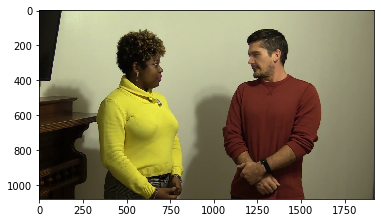

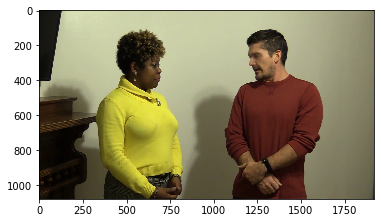

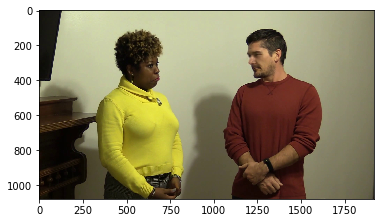

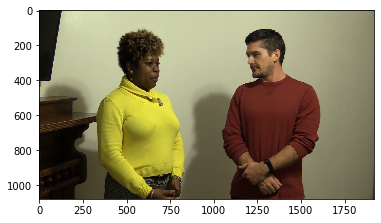

In [212]:
plt.imshow(Image.open(frames[g[0][0]][1]))
plt.show()

plt.imshow(Image.open(frames[g[1][0]][1]))
plt.show()

plt.imshow(Image.open(frames[g[2][0]][1]))
plt.show()

plt.imshow(Image.open(frames[g[3][0]][1]))
plt.show()

For each set, I took a random frame and printed that frame.
We can see significant change in frames.

Total sets: 20


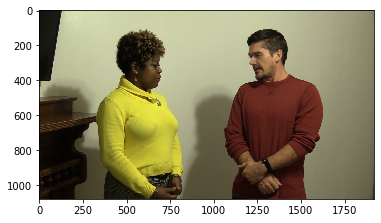

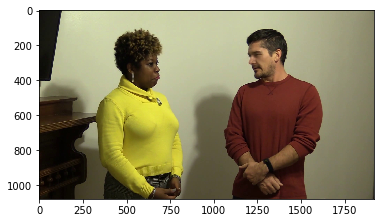

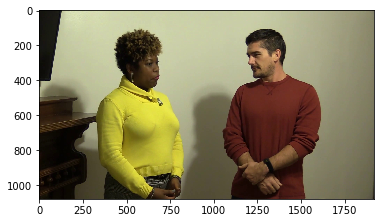

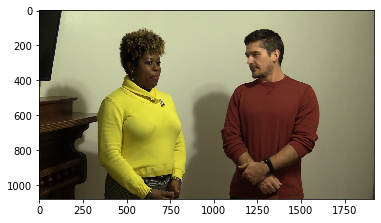

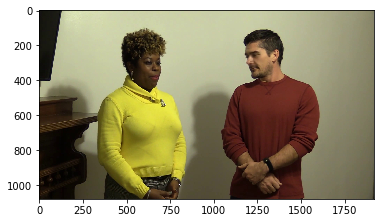

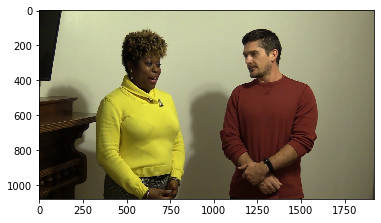

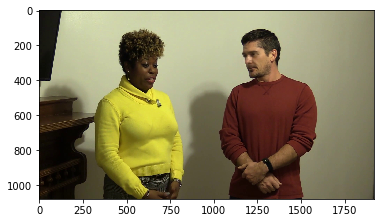

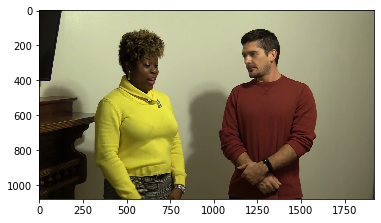

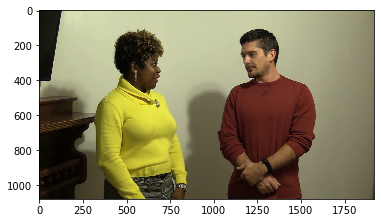

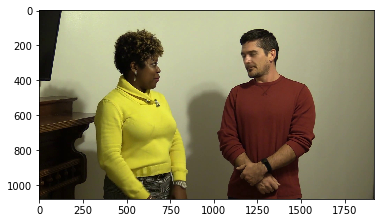

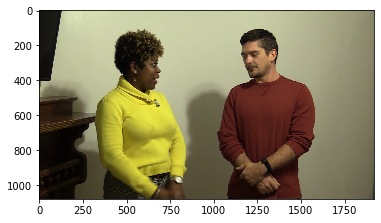

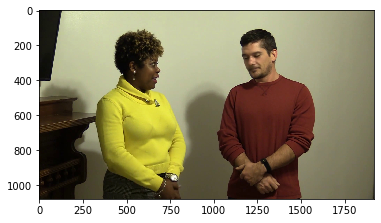

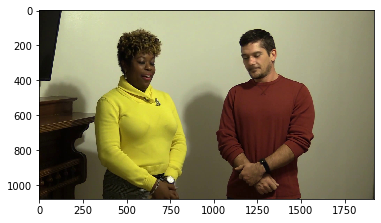

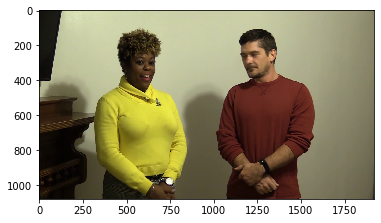

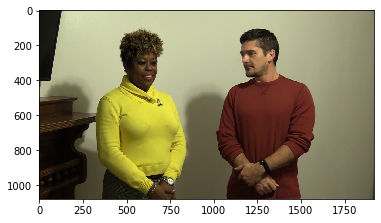

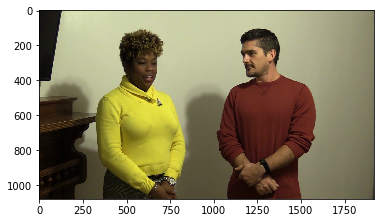

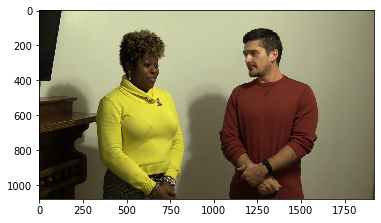

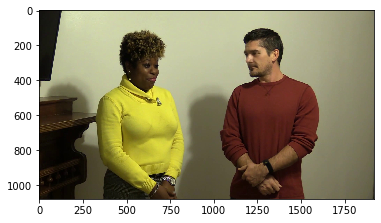

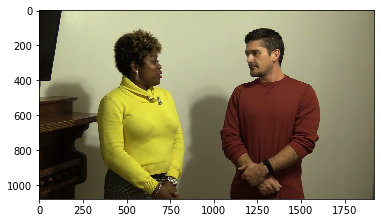

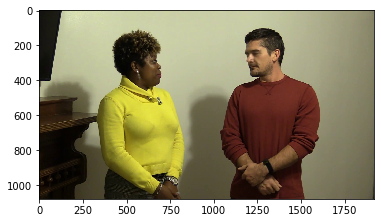

In [213]:

print("Total sets: " + str(sets))

for i in range(sets):
  random_index = int(random.randint(0, len(g[i]) - 1))
  plt.imshow(Image.open(frames[g[i][random_index]][1]))
  plt.show()